In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
data1 = Dataset('Pcfruit')
data1.read(data='D. suzukii', setting='psd_dB')
data1.clean()

Data: D. suzukii.
Read 8567 filenames in 0.13 seconds.
Loaded data into matrix in 2.84 seconds.


<Figure size 640x480 with 1 Axes>

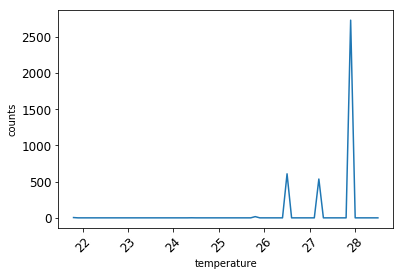

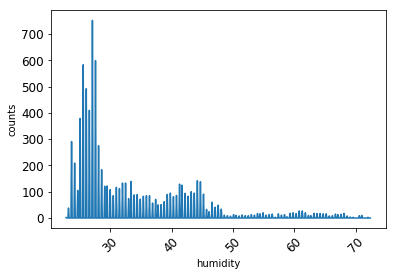

In [3]:
data1.get_sensor_features()
np_hist(data1.df_features, 'temperature')
np_hist(data1.df_features, 'humidity')

Data: Suzukii.
Read 13619 filenames in 0.14 seconds.
Loaded data into matrix in 3.74 seconds.


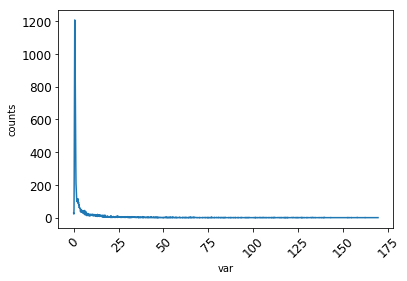

In [4]:
data2 = Dataset('Thomas')
data2.read(data='Suzukii', setting='psd_dB')
data2.clean()

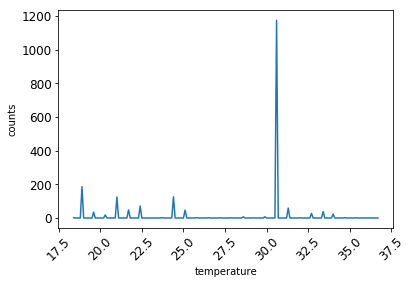

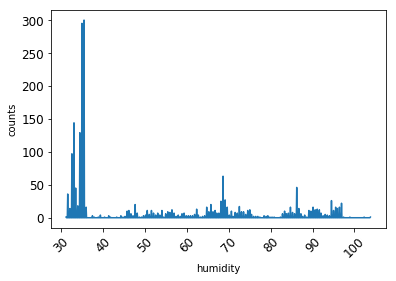

In [5]:
data2.get_sensor_features()
np_hist(data2.df_features, 'temperature')
np_hist(data2.df_features, 'humidity')

In [30]:
X_pcfruit = make_df_parallel(setting='raw', names=data1.filenames)
X_pcfruit['y'] = 1

In [31]:
X_thomas = make_df_parallel(setting='raw', names=data2.filenames)
X_thomas['y'] = 2

In [32]:
X = np.vstack((X_thomas.values[:,:-1], X_pcfruit.values[:,:-1]))
X.shape

(10460, 5000)

In [38]:
y = np.vstack((X_thomas.y.values.reshape(-1,1), X_pcfruit.y.values.reshape(-1,1)))
y.shape

(10460, 1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost
from utils import get_classifier

# clf_name = 'xgboost'
# classifier = get_classifier(clf_name)

import xgboost
classifier = xgboost.XGBClassifier(n_estimators=150, 
                                   learning_rate=0.2, 
                                   n_jobs=-1,
                                   class_weight={0:50., 1:1., 2:1., 3:1.},
                                   random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print("Name: %s, ac: %f" % ('model', ac))


/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Name: model, ac: 0.991874


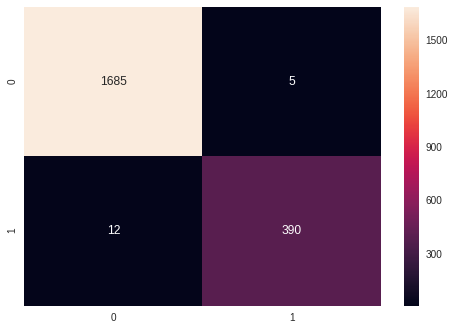

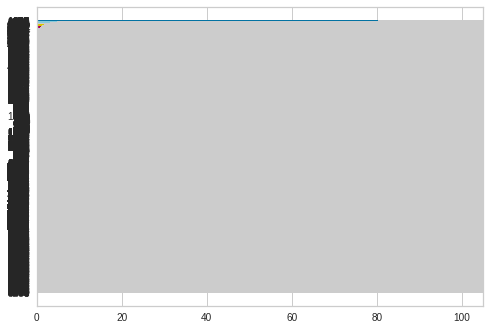

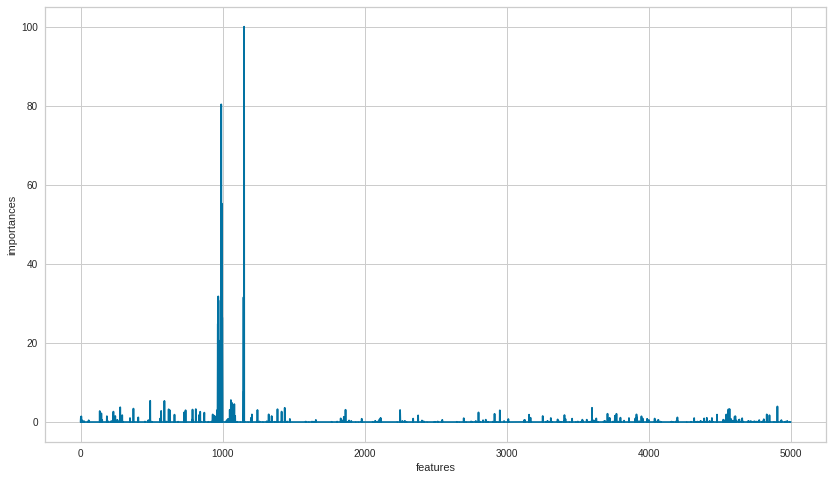

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

from yellowbrick.model_selection import FeatureImportances

model = classifier
viz = FeatureImportances(model);
viz.fit(X_test, y_test);

plt.figure(figsize=(14,8))
sub = pd.DataFrame(np.vstack((viz.features_,viz.feature_importances_))).T
sub.columns = ['features','importances']
sns.lineplot(x=sub.features, y=sub.importances)